## Wine Quality Classifier (Model Training and Experiment Tracking):
* [Model Training and Hyperparameter Tuning](#training)
* [Test Model Performance on 6 DataPoints](#model-performance)
* [Experiment Tracking & Model Registration](#experiment-tracking)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

import mlflow

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
 
import warnings
warnings.filterwarnings('ignore')

<a id="training"></a>
# Model Training and Hyperparameter Tuning

In [7]:
# Load training data and assign the X_train and y_train
train_df = pd.read_csv('training_data/train_dataset.csv')

X_train = train_df.drop(['best quality'], axis=1)
y_train = train_df['best quality']

print("X_train.shape: ", X_train.shape)
print("y_train.shape: ", y_train.shape)
train_df.head()


X_train.shape (2938, 11)
y_train.shape (2938,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,8.3,0.25,0.33,2.5,0.053,12.0,72.0,0.99404,2.89,0.48,9.5,0
1,7.0,0.21,0.28,8.6,0.045,37.0,221.0,0.99540,3.25,0.54,10.4,1
2,6.0,0.33,0.26,5.1,0.051,16.0,119.0,0.99416,3.15,0.41,9.2,0
3,7.9,0.26,0.33,10.3,0.039,73.0,212.0,0.99690,2.93,0.49,9.5,1
4,6.9,0.29,0.25,12.2,0.040,29.0,136.0,0.99552,3.05,0.65,10.4,1


In [8]:
# Load testing data and assign the X_test and y_test
test_df = pd.read_csv('testing_data/test_dataset.csv')

X_test = test_df.drop(['best quality'], axis=1)
y_test = test_df['best quality']

print("X_test.shape: ", X_test.shape)
print("y_test.shape: ", y_test.shape)

test_df.head()

X_test.shape:  (980, 11)
y_test.shape:  (980,)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,4.6,0.445,0.00,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2,0
1,6.5,0.180,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.60,11.5,1
2,8.3,0.160,0.37,7.9,0.025,38.0,107.0,0.99306,2.93,0.37,11.9,1
3,5.9,0.440,0.36,2.5,0.030,12.0,73.0,0.99201,3.22,0.48,10.8,1
4,5.8,0.180,0.28,1.3,0.034,9.0,94.0,0.99092,3.21,0.52,11.2,1


In [9]:
# Data processing and Model training for Logistic Regression
solver='lbfgs'
class_weight='balanced'
model_logreg = LogisticRegression(solver=solver, multi_class ='auto', class_weight=class_weight)
model_logreg.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', multi_class='auto')

In [10]:
# Calculate predictions
train_preds = model_logreg.predict(X_train)
val_preds = model_logreg.predict(X_test)

print('Logistic Regression:')
training_accuracy = metrics.accuracy_score(y_train, train_preds)
val_accuracy=metrics.accuracy_score(y_test, val_preds)
print(f'Training Accuracy: {training_accuracy:.4f}')
print(f'Validation Accuracy: {val_accuracy:.4f}')

Logistic Regression:
Training Accuracy: 0.7076
Validation Accuracy: 0.7061


In [11]:
# Validation
y_pred = model_logreg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("The precision of the model: {:.2f}%".format(accuracy * 100))

The precision of the model: 70.61%


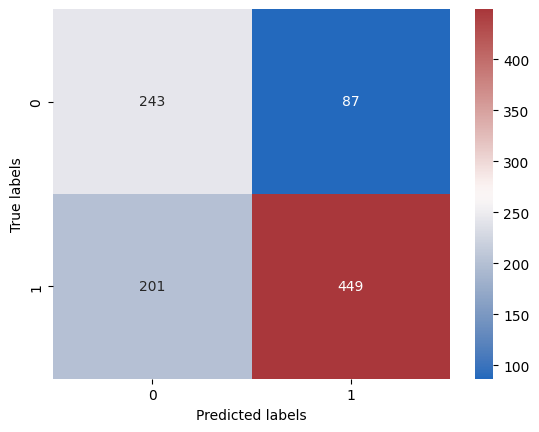

In [12]:
# Defining confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred)

# # Visualizing confusion matrix

sb.heatmap(conf_matrix, cmap="vlag", annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [13]:
# Print the classification report for the best performing model.
print(metrics.classification_report(y_test,model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.74      0.63       330
           1       0.84      0.69      0.76       650

    accuracy                           0.71       980
   macro avg       0.69      0.71      0.69       980
weighted avg       0.74      0.71      0.71       980



<a id="model-performance"></a>
# Test Model Performance on 6 DataPoints

In [15]:
# Test Model Performance on 6 data points from testing_data/test_dataset.csvt
test_df_6 = test_df.head(6)

# Prepare the test input by dropping the 'best quality' columns
test_df_6_input = test_df_6.drop(['best quality'], axis=1)

# Extract the actual Wine Quality for the first 6 examples from test_dataset
actual_class_test = test_df_6['best quality']

# Use the trained model to predict the class for the test input
predicted_class_test = pd.DataFrame(model_logreg.predict(test_df_6_input), columns=['Predicted Wine Quality'])

# Combine predicted and actual classes into a single DataFrame
model_output = pd.concat([predicted_class_test, actual_class_test.reset_index(drop=True)], axis=1)

# Rename columns for clarity
model_output.columns = ['Predicted Wine Quality', 'Actual Wine Quality']

print(model_output)

   Predicted Wine Quality  Actual Wine Quality
0                       0                    0
1                       1                    1
2                       1                    1
3                       0                    1
4                       1                    1
5                       1                    1


<a id="experiment-tracking"></a>
# Experiment Tracking & Model Registration

In [18]:
# Store Model and its dependencies on MLFlow
mlflow.set_tracking_uri(uri="http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/")
mlflow.set_experiment("test test test test")
with mlflow.start_run():
    
    # store model's parameters
    mlflow.log_param("solver", solver)
    mlflow.log_param("class_weight", class_weight)
    
    # store model's metrices
    mlflow.log_metric("Training Accuracy", training_accuracy)
    mlflow.log_metric("Validation Accuracy", val_accuracy)

    # store model
    mlflow.sklearn.log_model(
        sk_model=model_logreg,
        artifact_path="model_logreg",
        registered_model_name="ElasticnetWineModel",
    )

2025/01/28 12:05:49 INFO mlflow.tracking.fluent: Experiment with name 'test test test test' does not exist. Creating a new experiment.
2025/01/28 12:06:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Registered model 'ElasticnetWineModel' already exists. Creating a new version of this model...
2025/01/28 12:06:10 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: ElasticnetWineModel, version 2
Created version '2' of model 'ElasticnetWineModel'.


🏃 View run salty-goat-1000 at: http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/#/experiments/4/runs/bf7d9b0c14694c6587110f38a88f1361
🧪 View experiment at: http://mlflow-mlflow.apps.cluster-db46l.dynamic.redhatworkshops.io/#/experiments/4


IGNORE BELOW CELLs:

In [16]:
test_df_6_input.to_json(orient ='split')

'{"columns":["fixed acidity","volatile acidity","citric acid","residual sugar","chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol"],"index":[0,1,2,3,4,5],"data":[[4.6,0.445,0.0,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2],[6.5,0.18,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.6,11.5],[8.3,0.16,0.37,7.9,0.025,38.0,107.0,0.99306,2.93,0.37,11.9],[5.9,0.44,0.36,2.5,0.03,12.0,73.0,0.99201,3.22,0.48,10.8],[5.8,0.18,0.28,1.3,0.034,9.0,94.0,0.99092,3.21,0.52,11.2],[7.3,0.2,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0]]}'

In [17]:
test_df_6_input.to_json(orient ='values')

'[[4.6,0.445,0.0,1.4,0.053,11.0,178.0,0.99426,3.79,0.55,10.2],[6.5,0.18,0.33,1.4,0.029,35.0,138.0,0.99114,3.36,0.6,11.5],[8.3,0.16,0.37,7.9,0.025,38.0,107.0,0.99306,2.93,0.37,11.9],[5.9,0.44,0.36,2.5,0.03,12.0,73.0,0.99201,3.22,0.48,10.8],[5.8,0.18,0.28,1.3,0.034,9.0,94.0,0.99092,3.21,0.52,11.2],[7.3,0.2,0.39,2.3,0.048,24.0,87.0,0.99044,2.94,0.35,12.0]]'